# IMPORT DATASET 

In [16]:
# Import the Excel data file
import pandas as pd
excel_file_path = r"C:\Users\Administrator\Desktop\dataset\segmentation.xlsx"
data = pd.read_excel(excel_file_path)
# Display the data
data.head()

,customer_id,event_type,event_time,product_id,category_id,category,brand,price,user_session
0,520088904,view,2020-11-01 00:00:00 UTC,1003461,2.053014e+18,electronics.smartphone,xiaomi,489.07,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,530496790,view,2020-11-01 00:00:00 UTC,5000088,2.053014e+18,appliances.sewing_machine,janome,293.65,8e5f4f83-366c-4f70-860e-ca7417414283
2,561587266,view,2020-11-01 00:00:01 UTC,17302664,2.053014e+18,NaN,creed,28.31,755422e7-9040-477b-9bd2-6a6e8fd97387
3,518085591,view,2020-11-01 00:00:01 UTC,3601530,2.053014e+18,appliances.kitchen.washer,lg,712.87,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,558856683,view,2020-11-01 00:00:01 UTC,1004775,2.053014e+18,electronics.smartphone,xiaomi,183.27,313628f1-68b8-460d-84f6-cec7a8796ef2


In [17]:
data.shape

(34358, 9)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34358 entries, 0 to 34357
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   34358 non-null  int64  
 1   event_type    34358 non-null  object 
 2   event_time    34358 non-null  object 
 3   product_id    34358 non-null  int64  
 4   category_id   34358 non-null  float64
 5   category      22293 non-null  object 
 6   brand         28737 non-null  object 
 7   price         34358 non-null  float64
 8   user_session  34358 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.4+ MB


In [19]:
print(data.dtypes)

customer_id       int64
event_type       object
event_time       object
product_id        int64
category_id     float64
category         object
brand            object
price           float64
user_session     object
dtype: object


# DESCRIPTIVE STATISTICS

In [20]:
# DESCRIPTIVE STATISTICS
# Generating descriptive statistics
descriptive_stats = data.drop(columns=['customer_id', 'product_id']).describe(include='all', datetime_is_numeric=True)
descriptive_stats

,event_type,event_time,category_id,category,brand,price,user_session
count,34358,34358,3.435800e+04,22293,28737,34358.000000,34358
unique,3,7386,NaN,112,1136,NaN,8698
top,view,2020-11-01 02:15:20 UTC,NaN,electronics.smartphone,samsung,NaN,59f9573a-87ea-47c3-af23-a9778e545443
freq,33721,19,NaN,8014,3765,NaN,90
mean,NaN,NaN,2.058003e+18,NaN,NaN,292.029895,NaN
std,NaN,NaN,1.964537e+16,NaN,NaN,357.913757,NaN
min,NaN,NaN,2.053014e+18,NaN,NaN,0.000000,NaN
25%,NaN,NaN,2.053014e+18,NaN,NaN,66.670000,NaN
50%,NaN,NaN,2.053014e+18,NaN,NaN,169.630000,NaN
75%,NaN,NaN,2.053014e+18,NaN,NaN,360.340000,NaN


# DATA CLEANSING AND PREPROCESSING

In [21]:
# Checking for missing values
missing_values = data.isnull().sum()
# Data types of each column
data_types = data.dtypes
missing_values, data_types

(customer_id         0
 event_type          0
 event_time          0
 product_id          0
 category_id         0
 category        12065
 brand            5621
 price               0
 user_session        0
 dtype: int64,
 customer_id       int64
 event_type       object
 event_time       object
 product_id        int64
 category_id     float64
 category         object
 brand            object
 price           float64
 user_session     object
 dtype: object)

In [22]:
# Imputing missing values for categorical columns
categorical_cols = ['brand','category']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Checking for missing values again to verify the changes
missing_values_after_handling = data.isnull().sum()
print(missing_values_after_handling)

customer_id     0
event_type      0
event_time      0
product_id      0
category_id     0
category        0
brand           0
price           0
user_session    0
dtype: int64


# EXPLORATORY DATA ANALYSIS (EDA)

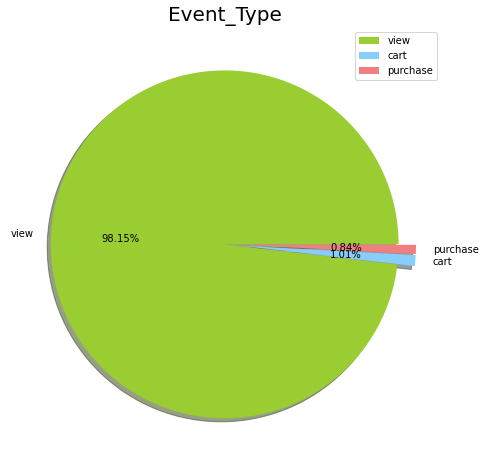

In [23]:
import matplotlib.pyplot as plt  
labels = ['view', 'cart', 'purchase']
size = data['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
explode = [0, 0.1, 0.1]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Event_Type', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

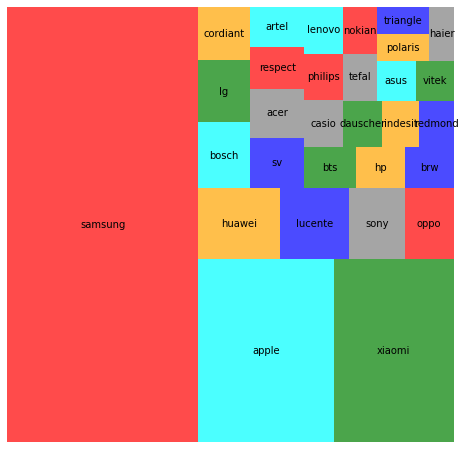

In [24]:
import squarify
top_brand_n = 30
top_brand = data['brand'].value_counts()[:top_brand_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_brand, 'top_category':top_brand.index.array })

squarify.plot(sizes=top_brand, label=top_brand.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

In [25]:
#items that customer bought
purchase = data.loc[data['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase

,customer_id,event_type,event_time,product_id,category_id,category,brand,price,user_session
107,559368633,purchase,2020-11-01 00:00:41 UTC,13200605,2.053014e+18,furniture.bedroom.bed,samsung,566.30,d6034fa2-41fb-4ac0-9051-55ea9fc9147a
168,513351129,purchase,2020-11-01 00:01:04 UTC,1005161,2.053014e+18,electronics.smartphone,xiaomi,211.92,e6b7ce9b-1938-4e20-976c-8b4163aea11d
707,562958505,purchase,2020-11-01 00:04:51 UTC,1004856,2.053014e+18,electronics.smartphone,samsung,128.42,0f039697-fedc-40fa-8830-39c1a024351d
811,541854711,purchase,2020-11-01 00:05:34 UTC,26401669,2.053014e+18,electronics.smartphone,lucente,109.66,c41c44d5-ef9b-41b9-9cd6-8d96dda6e927
939,557746614,purchase,2020-11-01 00:06:33 UTC,1801881,2.053014e+18,electronics.video.tv,samsung,488.80,4d76d6d3-fff5-4880-8327-e9e57b618e0e
...,...,...,...,...,...,...,...,...,...
34050,513944189,purchase,2020-11-01 02:19:47 UTC,15200779,2.053014e+18,electronics.smartphone,volta,38.87,1de76b21-d9df-4bef-baee-8b8876788b74
34051,526062582,purchase,2020-11-01 02:19:47 UTC,2402228,2.053014e+18,appliances.kitchen.hood,oasis,97.79,00e41c3f-42eb-48d5-92a5-1856f425ccb1
34074,540510262,purchase,2020-11-01 02:19:49 UTC,1004897,2.053014e+18,electronics.smartphone,huawei,952.15,3073280e-ec9a-457f-8bbc-93060f3a5b87
34108,543264125,purchase,2020-11-01 02:19:54 UTC,4804056,2.053014e+18,electronics.audio.headphone,apple,160.57,d0b5a241-6d28-4ab7-9184-cfd1b030d695


In [26]:
#users journey
user_session = 520088904
data.loc[data['customer_id'] == user_session]

,customer_id,event_type,event_time,product_id,category_id,category,brand,price,user_session
0,520088904,view,2020-11-01 00:00:00 UTC,1003461,2.053014e+18,electronics.smartphone,xiaomi,489.07,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
95,520088904,view,2020-11-01 00:00:36 UTC,1004184,2.053014e+18,electronics.smartphone,xiaomi,463.15,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
121,520088904,view,2020-11-01 00:00:47 UTC,1003461,2.053014e+18,electronics.smartphone,xiaomi,489.07,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
131,520088904,view,2020-11-01 00:00:50 UTC,1005234,2.053014e+18,electronics.smartphone,xiaomi,398.72,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
263,520088904,view,2020-11-01 00:01:48 UTC,1003898,2.053014e+18,electronics.smartphone,oneplus,540.30,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
329,520088904,view,2020-11-01 00:02:17 UTC,1003898,2.053014e+18,electronics.smartphone,oneplus,540.30,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
352,520088904,view,2020-11-01 00:02:24 UTC,1003499,2.053014e+18,electronics.smartphone,oneplus,461.61,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
397,520088904,view,2020-11-01 00:02:41 UTC,1003499,2.053014e+18,electronics.smartphone,oneplus,461.61,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
416,520088904,view,2020-11-01 00:02:48 UTC,1003898,2.053014e+18,electronics.smartphone,oneplus,540.30,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
6378,520088904,view,2020-11-01 00:38:37 UTC,1701552,2.053014e+18,computers.peripherals.monitor,acer,217.51,bbd7ce29-5406-4c52-b239-f0dd3b12427e


# FEATURE SELECTION 

In [27]:
# FEATURE SELECTION 
# Encoding categorical variables - One Hot Encoding for 'event_type', 'brand', 'category'
subset_encoded = pd.get_dummies(data, columns=['event_type', 'brand', 'category'])

# Analyzing Customer Behavior: Frequency of different event types
event_type_distribution = data['event_type'].value_counts()

# Analyzing Category and Brand Distribution
category_distribution = data['category'].value_counts()
brand_distribution = data['brand'].value_counts()

# Define 'price_description' variable or remove it if not needed
price_description = "Your description here"

event_type_distribution, category_distribution.head(5), brand_distribution.head(5), price_description

(view        33721
 purchase      347
 cart          290
 Name: event_type, dtype: int64,
 electronics.smartphone         20079
 electronics.video.tv             974
 electronics.clocks               949
 electronics.audio.headphone      927
 computers.notebook               802
 Name: category, dtype: int64,
 samsung    9386
 apple      2801
 xiaomi     2477
 huawei      660
 lucente     555
 Name: brand, dtype: int64,
 'Your description here')

# CLUSTERING ALGORITHMN SELECTION

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\clust

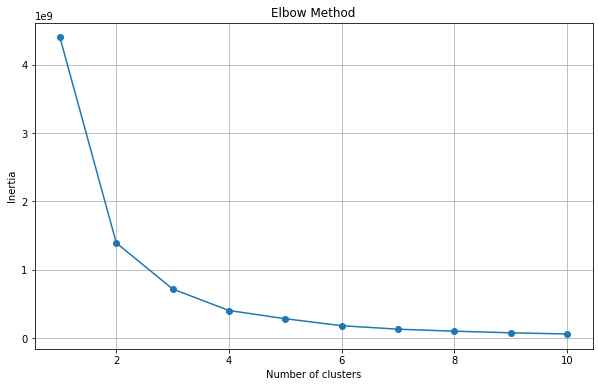

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
# For this example, let's use one-hot encoded features and 'price'
features_for_clustering = subset_encoded.drop(['customer_id', 'event_time', 'product_id', 'category_id', 'user_session'], axis=1)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_for_clustering)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [30]:
# Applying K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_for_clustering)

# Adding the cluster labels to the original data subset
data['Cluster'] = clusters

# Analyzing the centroids of each cluster
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features_for_clustering.columns)
cluster_centers

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,price,event_type_cart,event_type_purchase,event_type_view,brand_a-case,brand_acer,brand_acme,brand_activision,brand_adam,brand_adamex,...,category_kids.dolls,category_kids.fmcg.diapers,category_kids.skates,category_kids.swing,category_kids.toys,category_medicine.tools.tonometer,category_sport.bicycle,category_sport.ski,category_sport.snowboard,category_sport.trainer
0,867.628735,0.011698,0.009801,0.978501,-2.710505e-19,0.027506,2.602085e-18,2.710505e-19,5.421011e-19,-8.402567e-19,...,1.105886e-17,2.602085e-18,0.000948,-1.355253e-19,3.556183e-17,-4.228388e-18,0.004110,-8.402567e-19,-8.402567e-19,0.001581
1,375.356398,0.007934,0.009974,0.982092,6.261268e-18,0.019381,-1.940722e-17,-1.362029e-18,2.266803e-04,3.400204e-04,...,-4.380177e-17,-1.745565e-17,0.004080,3.130634e-18,-4.770490e-18,-5.963112e-18,0.002493,5.667007e-04,5.667007e-04,0.004194
2,99.069178,0.007769,0.009982,0.982249,2.825125e-04,0.001507,6.121104e-04,4.708541e-05,6.911789e-19,9.417083e-05,...,2.071758e-03,1.271306e-03,0.000094,1.412562e-04,3.578491e-03,3.295979e-04,0.001224,-1.788934e-18,-1.788934e-18,0.001695
3,1652.074727,0.015873,0.014109,0.970018,9.215718e-19,0.011464,2.005774e-18,-1.084202e-19,-2.168404e-19,-4.878910e-19,...,-4.119968e-18,-3.469447e-18,0.006173,4.607859e-19,7.806256e-18,-1.626303e-19,0.025573,-4.878910e-19,-4.878910e-19,0.004409
